# Možné drobné úkoly

Segmentace:

* spočítat papírky
* spočítat světlé papírky
* spočítat červené papírky
* spočítat papírky, které se dotýkají
* Nakreslenému panáčkovi vymazat ruce (FT)
* Odstranit mříže na nakresleném obrázku

# Řešení klasifikace

Populating the interactive namespace from numpy and matplotlib
[-1  0  1  2  3  4  5  6  7  8]


[[374.53405460951763, 7824.0, 17.928905682802291],
 [355.52900397563428, 7538.0, 16.768489343049428],
 [356.42640687119285, 7883.0, 16.115664533186493],
 [562.90158697766469, 6992.0, 45.317247800625488],
 [564.8843430349616, 7002.0, 45.571882463016301],
 [557.12698372208092, 6975.0, 44.500426665414167],
 [163.4386001800126, 1969.0, 13.566366698223472],
 [166.02438661763949, 2023.0, 13.625356871855379],
 [167.4386001800126, 2056.0, 13.63603347774422]]

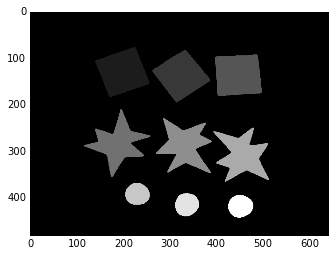

In [29]:
%pylab inline --no-import-all
import matplotlib.pyplot as plt
import scipy
import urllib
import cStringIO
import skimage
import skimage.color
import skimage.filter
import skimage.measure
from sklearn import svm
from sklearn import neighbors


# URL = "http://uc452cam01-kky.fav.zcu.cz/snapshot.jpg"
URL = "https://raw.githubusercontent.com/mjirik/ZDO/master/objekty/ctverce_hvezdy_kolecka.jpg"
# URL = "http://uc452cam01-kky.fav.zcu.cz/snapshot.jpg"

file = cStringIO.StringIO(urllib.urlopen(URL).read())

im = scipy.misc.imread(file)
img = skimage.color.rgb2gray(im)
plt.figure(figsize=(5,5))

# předzpracování
img = skimage.filter.gaussian_filter(img, 2)
# val = filter.threshold_otsu(camera)
thr = skimage.filter.threshold_otsu(img)
imthr = img > thr

imlab = skimage.measure.label(imthr, background=0)
plt.figure()
plt.imshow(imlab, cmap='gray')

print np.unique(imlab)
props = skimage.measure.regionprops(imlab + 1)

train_data = []
for pr in props:
    
    train_data.append(
        [pr.perimeter, pr.area, pr.perimeter**2/pr.area]
    )



train_target = [0,0,0,1,1,1,2,2,2]
svc = neighbors.KNeighborsClassifier()
# svc = svm.SVC()
svc.fit(train_data, train_target) 
train_data

[-1  0  1  2]
predikce  [0 1 2]


[[373.20310216782974, 7889.0, 17.655033016566303],
 [553.73001410241091, 6896.0, 44.463011676023228],
 [165.19595949289334, 2021.0, 13.503070278464946]]

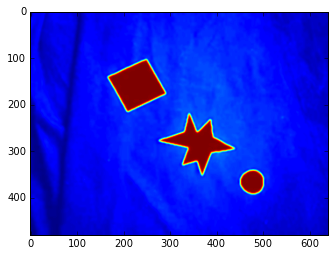

In [28]:
# testujeme
URL = "https://raw.githubusercontent.com/mjirik/ZDO/master/objekty/15.jpg"
# URL = "https://raw.githubusercontent.com/mjirik/ZDO/master/objekty/ctverce_hvezdy_kolecka.jpg"
# URL = "http://uc452cam01-kky.fav.zcu.cz/snapshot.jpg"

file = cStringIO.StringIO(urllib.urlopen(URL).read())

im = scipy.misc.imread(file)
img = skimage.color.rgb2gray(im)


# předzpracování
img = skimage.filter.gaussian_filter(img, 2)
thr = skimage.filter.threshold_otsu(img)
imthr = img > thr
imlab = skimage.measure.label(imthr, background=0)

# příznakový vektor
print np.unique(imlab)
props = skimage.measure.regionprops(imlab + 1)


test_data = []
for pr in props:
    
    test_data.append(
        [pr.perimeter, pr.area, (pr.perimeter**2)/pr.area])
    
y_pred = svc.predict(test_data)

print "predikce ", y_pred
plt.imshow(img)
test_data
